In [8]:
#regression model for solar radiation
import numpy as np
import pandas as pd
import os


In [9]:
sr=pd.read_csv('sr.csv')

In [10]:
dat=sr[['Column3','Column4','Column5']]

In [15]:
x=sr[['Column4','Column5']]
x_max = x.max()
x = x/[50,35]
y=sr['Column3']
y_max = y.max()
y=y/38

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
sr.shape

(92448, 9)

In [20]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.1)

In [ ]:
#where is it here i must have dleted that import .. 

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

Using TensorFlow backend.


In [22]:
from keras import optimizers

In [23]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

In [13]:
maxx=y.max()

In [1]:
def create_model(optimizer='adam',init_mode='uniform',dropout_rate=0.0,learn_rate=0.001):
    opts={'adam':optimizers.Adam(learn_rate),'sgd':optimizers.SGD(learn_rate),'rms':optimizers.RMSprop(learn_rate)}
    opt=opts[optimizer]
    model=Sequential()
    model.add(Dense(5,input_dim=2,kernel_initializer=init_mode,activation='relu'))
    model.add(Dense(6,activation='relu'))
    model.add(Dense(1,kernel_initializer=init_mode,activation='sigmoid'))
    model.compile(loss='mean_absolute_error',optimizer=opt)
    return model

In [25]:
model = create_model()

In [27]:
model.fit(xtr,ytr,batch_size=128,epochs=10,validation_data=(xte,yte))

Train on 83203 samples, validate on 9245 samples
Epoch 1/10
83203/83203 [==============================] - 1s 17us/step - loss: 0.0925 - val_loss: 0.0922
Epoch 2/10
83203/83203 [==============================] - 1s 16us/step - loss: 0.0924 - val_loss: 0.0922
Epoch 3/10
83203/83203 [==============================] - 2s 21us/step - loss: 0.0924 - val_loss: 0.0923
Epoch 4/10
83203/83203 [==============================] - 2s 20us/step - loss: 0.0924 - val_loss: 0.0921
Epoch 5/10
83203/83203 [==============================] - 2s 20us/step - loss: 0.0924 - val_loss: 0.0924
Epoch 6/10
83203/83203 [==============================] - 2s 23us/step - loss: 0.0924 - val_loss: 0.0924
Epoch 7/10
83203/83203 [==============================] - 2s 23us/step - loss: 0.0924 - val_loss: 0.0923
Epoch 8/10
83203/83203 [==============================] - 2s 18us/step - loss: 0.0924 - val_loss: 0.0922
Epoch 9/10
83203/83203 [==============================] - 2s 24us/step - loss: 0.0924 - val_loss: 0.0921
Epoch 

In [28]:
import matplotlib.pyplot as plt

In [30]:
res = model.predict(xte)

res = np.reshape(res,(-1,))

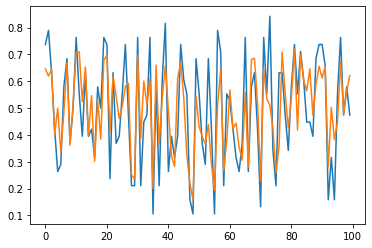

In [31]:
i=100
plt.plot(list(range(i)),yte[:i])
plt.plot(list(range(i)),res[:i])


In [32]:
import seaborn as sns

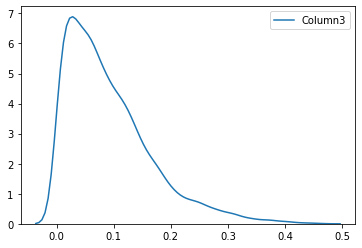

In [33]:
sns.kdeplot(abs(yte-res))

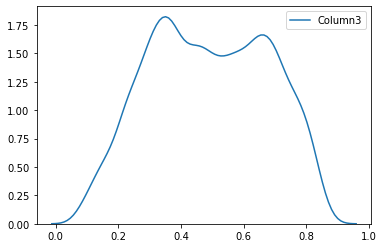

In [34]:
sns.kdeplot(yte)

In [35]:
x_max,y_max

(Column4    47.5
 Column5    30.0
 dtype: float64, 35)

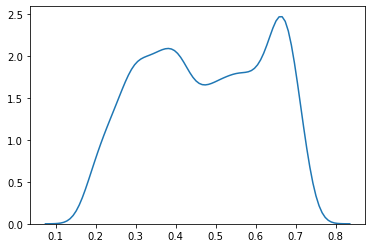

In [36]:
sns.kdeplot(res)

In [38]:
model.save('./solar_rad_X_50d5_Y_38.h5')

In [95]:
np.corrcoef([yte,res])

array([[1.        , 0.78249495],
       [0.78249495, 1.        ]])

In [65]:
np.corrcoef([yte,res])

array([[1.        , 0.78123854],
       [0.78123854, 1.        ]])